In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
rows_count, col_count = 10000, 1
X, y = make_regression(n_samples=rows_count, n_features=col_count, noise=6, bias=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [3]:
from utils.linear_regression import mse, forward, train_linear_regressor

losses, parameters, gradients, current_parameters = train_linear_regressor(X_train, y_train)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 1067.553832
Epoch 1, loss: 694.673442
Epoch 2, loss: 456.691533
Epoch 3, loss: 304.805323
Epoch 4, loss: 207.867615
Epoch 5, loss: 145.999463
Epoch 6, loss: 106.513608
Epoch 7, loss: 81.312714
Epoch 8, loss: 65.228852
Epoch 9, loss: 54.963715
Epoch 10, loss: 48.412239
Epoch 11, loss: 44.230918
Epoch 12, loss: 41.562291
Epoch 13, loss: 39.859104
Epoch 14, loss: 38.772085
Epoch 15, loss: 38.078322
Epoch 16, loss: 37.635545
Epoch 17, loss: 37.352953
Epoch 18, loss: 37.172595
Epoch 19, loss: 37.057486
Epoch 20, loss: 36.984021
Epoch 21, loss: 36.937133
Epoch 22, loss: 36.907209
Epoch 23, loss: 36.888110
Epoch 24, loss: 36.875920
Epoch 25, loss: 36.868141
Epoch 26, loss: 36.863176
Epoch 27, loss: 36.860007
Epoch 28, loss: 36.857984
Epoch 29, loss: 36.856694
Epoch 30, loss: 36.855870


In [4]:
y_pred = forward(X_test, current_parameters)
y_pred = y_pred.flatten()

print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters[0]}')

Mean Squared Error: 35.20223183352241
Parameters: [31.99041387]


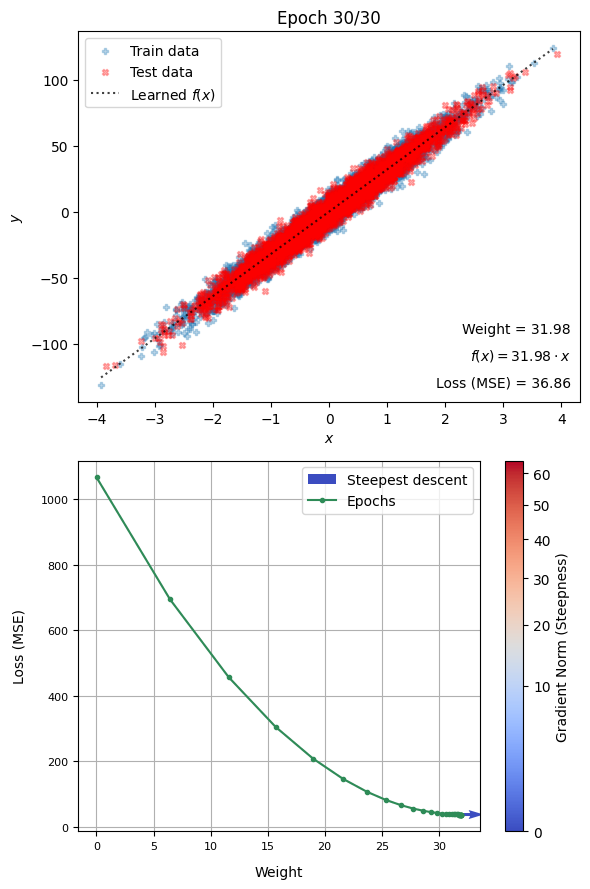

In [5]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_2D_loss
from utils.linear_regression import plot_2D_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

def plot_text(epoch_parameters, epoch_loss, text_w1, _, text_fn, text_loss):
    text_w1.set_position((0.96, 0.62))
    text_fn.set_position((0.96, 0.59))
    text_loss.set_position((0.96, 0.56))

    text_w1.set_text(rf'Weight = {epoch_parameters[0]:.2f}')
    text_fn.set_text(rf'$f(x) = {epoch_parameters[0]:.2f} \cdot x$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='upper left')
    
    ax2.set_xlabel('Weight', labelpad=10)
    ax2.set_ylabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_model,
    plot_2D_loss,
    plot_text,
    plot_other
)

In [6]:
from utils.plot_training import save_animation

experiment_name = '2D_linear_regression'
save_animation(frame_buffers, experiment_name)